### 统计学：检验心理学现象

在下方单元格中回答问题并执行相关代码，你可以 [参考项目指导](https://github.com/udacity/new-dand-advanced-china/blob/master/%E6%A3%80%E9%AA%8C%E5%BF%83%E7%90%86%E5%AD%A6%E7%8E%B0%E8%B1%A1/%E7%BB%9F%E8%AE%A1%E5%AD%A6%EF%BC%9A%E6%A3%80%E9%AA%8C%E5%BF%83%E7%90%86%E5%AD%A6%E7%8E%B0%E8%B1%A1.md) 并在正式提交前查看 [项目要求](https://review.udacity.com/#!/rubrics/305/view)。提交时请将 Jupyter notebook 导出成 HTML 或者 PDF 进行提交（File -> Download As）。

背景信息

在一个Stroop （斯特鲁普）任务中，参与者得到了一列文字，每个文字都用一种油墨颜色展示。参与者的任务是将文字的打印颜色大声说出来。这项任务有两个条件：一致文字条件，和不一致文字条件。在一致文字条件中，显示的文字是与它们的打印颜色匹配的颜色词，如“红色”、“蓝色”。在不一致文字条件中，显示的文字是与它们的打印颜色不匹配的颜色词，如“紫色”、“橙色”。在每个情况中，我们将计量说出同等大小的列表中的墨色名称的时间。每位参与者必须全部完成并记录每种条件下使用的时间。

调查问题

作为一般说明，请确保记录你在创建项目时使用或参考的任何资源。作为项目提交的一部分，你将需要报告信息来源。

(1) 我们的自变量是什么？因变量是什么？

自变量：文字条件（一致和不一致）
因变量：在不同情况下使用的时间

(2) 此任务的适当假设集是什么？你需要以文字和数学符号方式对假设集中的零假设和对立假设加以说明，并对数学符号进行定义。你想执行什么类型的统计检验？为你的选择提供正当理由（比如，为何该实验满足你所选统计检验的前置条件）。

原假设 H0:不存在Stroop效应，即在一致文字条件和不一致文字条件的情况下，所用时间总体均值没有差异 𝜇con = 𝜇incon  
备择假设 H1: 存在Stroop效应，即在一致文字条件和不一致文字条件的情况下，所用时间总体均值有差异 𝜇con ≠ 𝜇incon  

选择配对T检验： 
1. 不同取值对应两组因变量数据
2. 测试的是时间为连续变量
3. 这个测试是对相对独立的参与者，进行配对观测值之差的均值是否等于目标值
4. 样本量较小，只有24条，并且总体标准差未知
5. 前提条件：   
    1）测试者是随机挑选的，所以实验样本为随机样本   
    2）假设样本呈正态分布  

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [13]:
stroop =  pd.read_csv('stroopdata.csv')
stroop.head()

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803


现在轮到你自行尝试 Stroop 任务了。前往此链接，其中包含一个基于 Java 的小程序，专门用于执行 Stroop 任务。记录你收到的任务时间（你无需将时间提交到网站）。现在下载此数据集，其中包含一些任务参与者的结果。数据集的每行包含一名参与者的表现，第一个数字代表他们的一致任务结果，第二个数字代表不一致任务结果。

(3) 报告关于此数据集的一些描述性统计。包含至少一个集中趋势测量和至少一个变异测量。

In [14]:
# 在这里执行你的分析
round(stroop.describe(),2)

,Congruent,Incongruent
count,24.00,24.00
mean,14.05,22.02
std,3.56,4.80
min,8.63,15.69
25%,11.90,18.72
50%,14.36,21.02
75%,16.20,24.05
max,22.33,35.26


一致条件下 -- 平均数：14.05 中位数：14.36 标准差：3.56  
不一致条件下 -- 平均数：22.02 中位数：21.02 标准差：4.80

(4) 提供显示样本数据分布的一个或两个可视化。用一两句话说明你从图中观察到的结果。

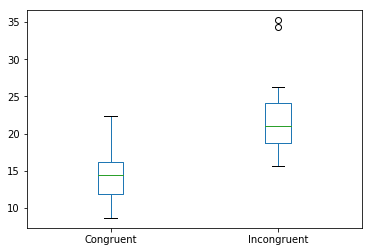

In [15]:
# 在这里创建可视化图表
stroop.plot.box()

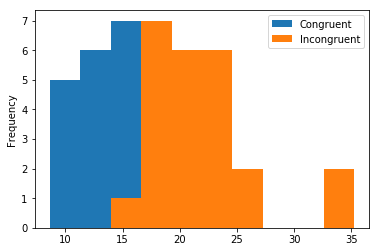

In [16]:
stroop.plot.hist()

从两幅图中可以明显观察到，一致文字条件下所花的时间明显小于不一致文字条件下的情况。并且在不一致条件下，还有两个异常值，远远大于均值。

(5) 现在，执行统计测试并报告你的结果。你的置信水平和关键统计值是多少？你是否成功拒绝零假设？对试验任务得出一个结论。结果是否与你的期望一致？

In [17]:
# 在这里执行统计检验
from scipy import stats

stroop['diff'] = stroop['Congruent'] - stroop['Incongruent']
stroop.head()

,Congruent,Incongruent,diff
0,12.079,19.278,-7.199
1,16.791,18.741,-1.950
2,9.564,21.214,-11.650
3,8.630,15.687,-7.057
4,14.669,22.803,-8.134


In [18]:
stats.ttest_rel(stroop['Congruent'], stroop['Incongruent'])

Ttest_relResult(statistic=-8.020706944109957, pvalue=4.1030005857111781e-08)

In [19]:
diff_mean = stroop['diff'].mean()
se = stats.sem(stroop['diff'])
t_value = diff_mean/se
print(t_value)

-8.02070694411


通过查表得知，当t值为-8.02是p值小于0.0001  

本次分析使用的是双尾t检验，置信度为95%，显著性水平为 𝛼=0.05   
自由度 df=23   
t临界值为(-2.069, 2.069)   

通过T检验，p值远远小于显著性水平0.05，并且t值为-8.02不在t临界值内，所以拒绝原假设，表明在一致文字条件和不一致文字条件的情况下，所用时间总体均值有差异，即Stroop效应存在。